In [ ]:
!pip install -q sklearn

In [1]:
%tensorflow_version 2.x
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
import seaborn as sb
import sklearn.preprocessing as preprocessing
from sklearn.svm import SVC

In [2]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [3]:
dftrain.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


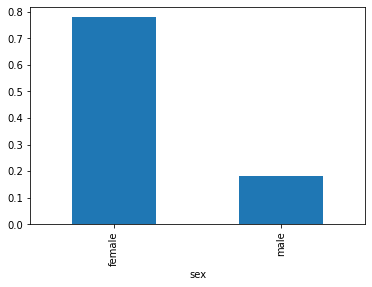

In [5]:
dftrain.groupby('sex').survived.mean().plot(kind = 'bar',label = 'sex')

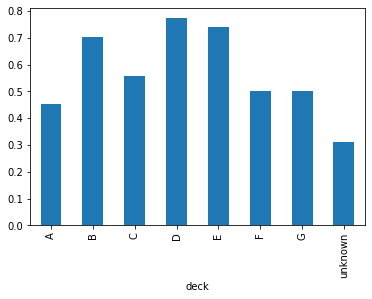

In [6]:
dftrain.groupby('deck').survived.mean().plot(kind = 'bar',label = 'deck')

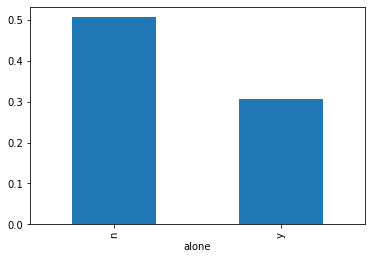

In [7]:
dftrain.groupby('alone').survived.mean().plot(kind = 'bar',label = 'alone')

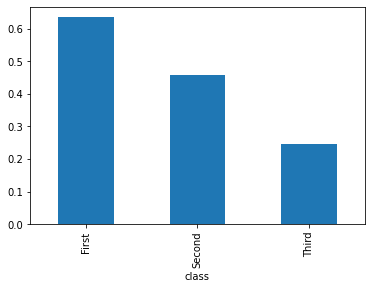

In [8]:
dftrain.groupby('class').survived.mean().plot(kind = 'bar',label = 'class')

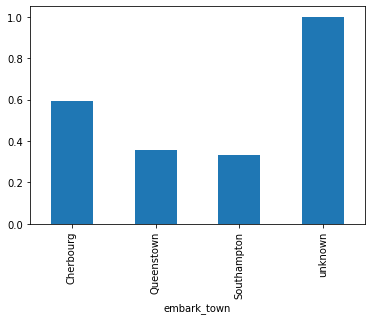

In [10]:
dftrain.groupby('embark_town').survived.mean().plot(kind = 'bar',label = 'embark_town')

In [11]:
le = preprocessing.LabelEncoder()
dftrain['sex'] = le.fit_transform(dftrain['sex'].astype(str))
dftrain['class'] = le.fit_transform(dftrain['class'].astype(str))
dftrain['deck'] = le.fit_transform(dftrain['deck'].astype(str))
dftrain['embark_town'] = le.fit_transform(dftrain['embark_town'].astype(str))
dftrain['alone'] = le.fit_transform(dftrain['alone'].astype(str))
dfeval['sex'] = le.fit_transform(dfeval['sex'].astype(str))
dfeval['class'] = le.fit_transform(dfeval['class'].astype(str))
dfeval['deck'] = le.fit_transform(dfeval['deck'].astype(str))
dfeval['embark_town'] = le.fit_transform(dfeval['embark_town'].astype(str))
dfeval['alone'] = le.fit_transform(dfeval['alone'].astype(str))

In [12]:
dftrain.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,7,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,7,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,7,1,1


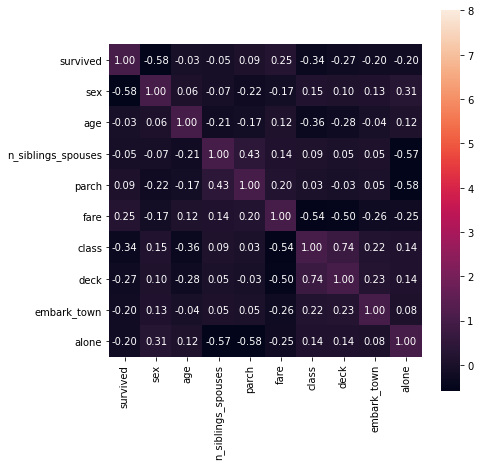

In [13]:
corrmat = dftrain.corr()
f,ax = plt.subplots(figsize = (7,7))
sb.heatmap(corrmat, vmax = 8,square = True,annot = True,fmt = '.2f')
plt.show()

In [14]:
x = dftrain[['sex','deck','class','alone','embark_town']]
y = dftrain['survived']
x1 = dfeval[['sex','deck','class','alone','embark_town']]
y1 = dfeval['survived']

In [20]:
classifier = SVC()

classifier.fit(x,y)

score = classifier.score(x,y)

print(score)

0.8054226475279107
